In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv("Result.csv")
train.shape

(502, 12)

In [3]:
train.rename(columns = {"Unnamed: 0" : "time"}, inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 12 columns):
time          502 non-null int64
Time          502 non-null object
delta         502 non-null int64
theta         502 non-null int64
lowAlpha      502 non-null int64
highAlpha     502 non-null int64
lowBeta       502 non-null int64
highBeta      502 non-null int64
lowGamma      502 non-null int64
midGamma      502 non-null int64
Meditation    502 non-null int64
Attention     502 non-null int64
dtypes: int64(11), object(1)
memory usage: 45.2+ KB


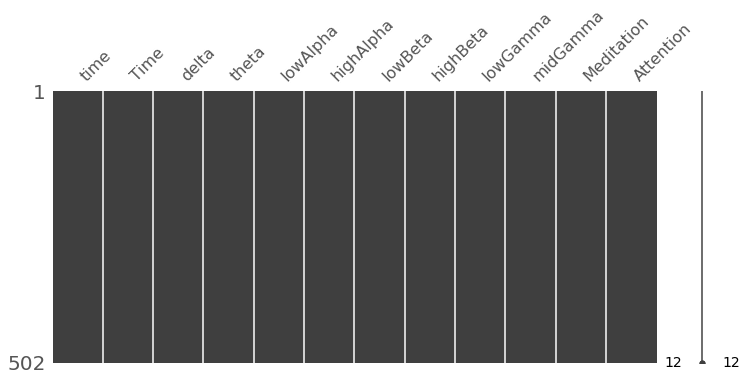

In [4]:
import missingno as msno
msno.matrix(train, figsize=(12,5))

In [5]:
train.isnull().sum()

time          0
Time          0
delta         0
theta         0
lowAlpha      0
highAlpha     0
lowBeta       0
highBeta      0
lowGamma      0
midGamma      0
Meditation    0
Attention     0
dtype: int64

[Text(0, 0.5, 'midGamma')]

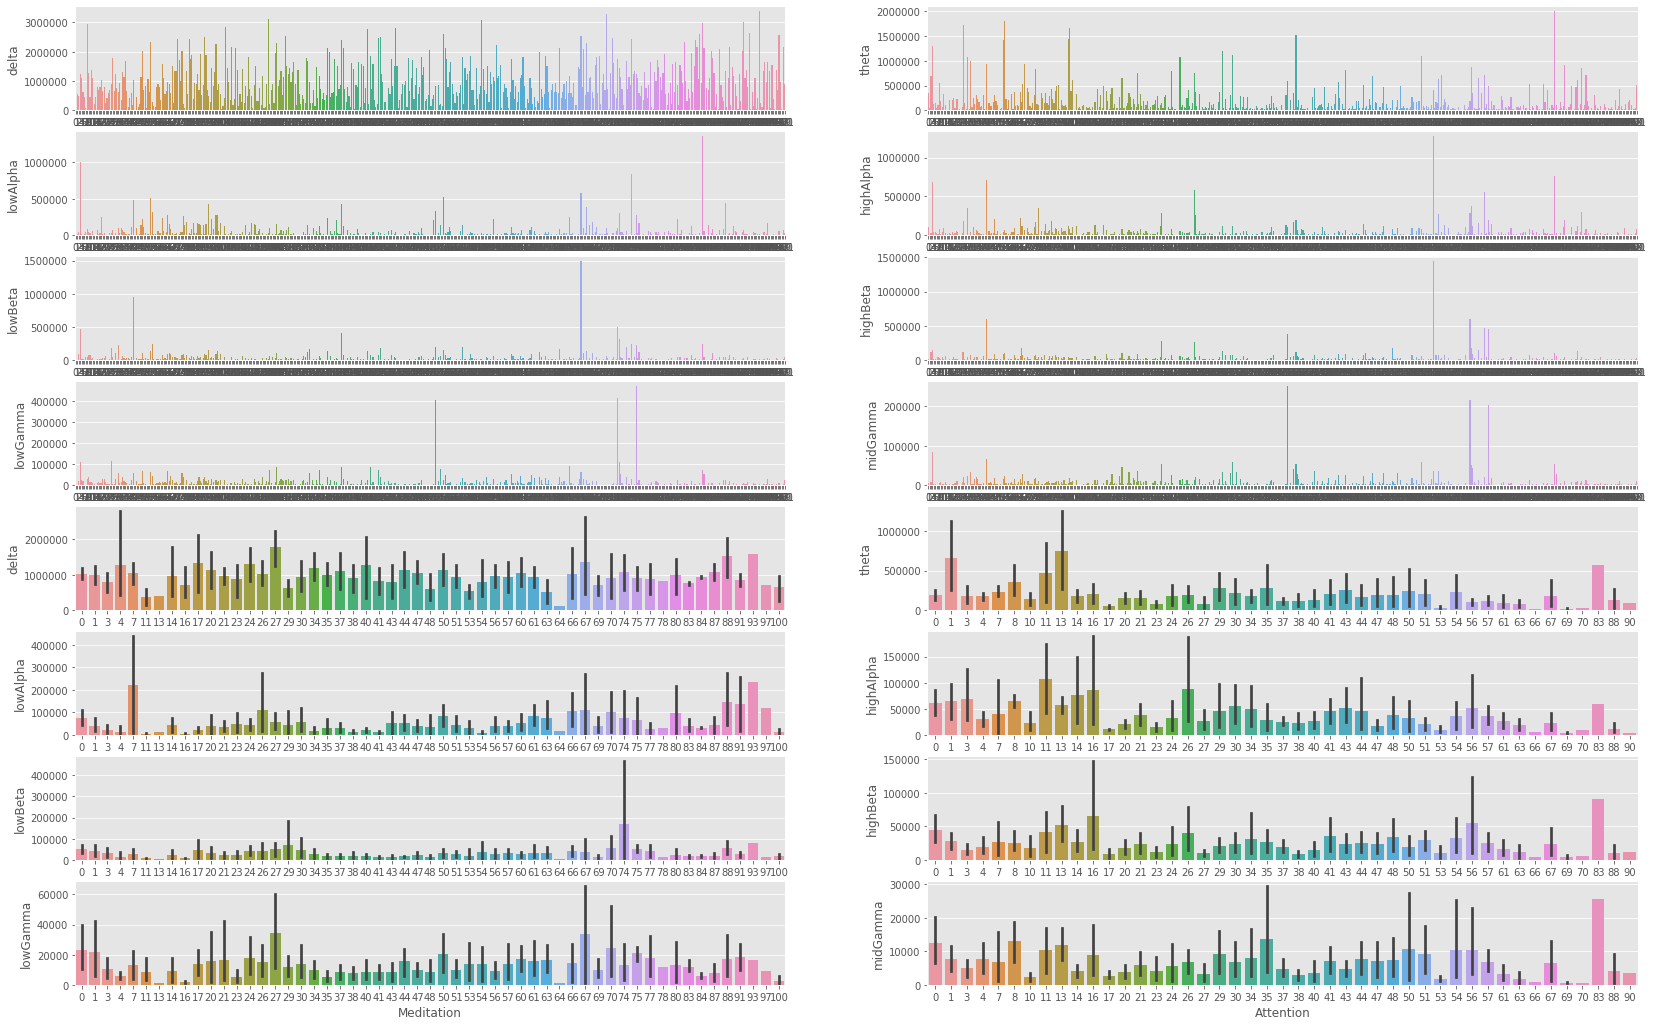

In [9]:
figure, ((ax1,ax2),(ax3, ax4), (ax5,ax6), (ax7, ax8),(ax9,ax10),(ax11, ax12), (ax13,ax14), (ax15, ax16)) = plt.subplots(nrows=8, ncols=2)
figure.set_size_inches(28,18)

sns.barplot(data=train, x="time", y="delta", ax=ax1)
sns.barplot(data=train, x="time", y="theta", ax=ax2)
sns.barplot(data=train, x="time", y="lowAlpha", ax=ax3)
sns.barplot(data=train, x="time", y="highAlpha", ax=ax4)
sns.barplot(data=train, x="time", y="lowBeta", ax=ax5)
sns.barplot(data=train, x="time", y="highBeta", ax=ax6)
sns.barplot(data=train, x="time", y="lowGamma", ax=ax7)
sns.barplot(data=train, x="time", y="midGamma", ax=ax8)
sns.barplot(data=train, x="Meditation", y="delta", ax=ax9)
sns.barplot(data=train, x="Attention", y="theta", ax=ax10)
sns.barplot(data=train, x="Meditation", y="lowAlpha", ax=ax11)
sns.barplot(data=train, x="Attention", y="highAlpha", ax=ax12)
sns.barplot(data=train, x="Meditation", y="lowBeta", ax=ax13)
sns.barplot(data=train, x="Attention", y="highBeta", ax=ax14)
sns.barplot(data=train, x="Meditation", y="lowGamma", ax=ax15)
sns.barplot(data=train, x="Attention", y="midGamma", ax=ax16)


ax1.set(ylabel='delta')
ax2.set(ylabel='theta')
ax3.set(ylabel='lowAlpha')
ax4.set(ylabel='highAlpha')
ax5.set(ylabel='lowBeta')
ax6.set(ylabel='highBeta')
ax7.set(ylabel='lowGamma')
ax8.set(ylabel='midGamma')
ax9.set(ylabel='delta')
ax10.set(ylabel='theta')
ax11.set(ylabel='lowAlpha')
ax12.set(ylabel='highAlpha')
ax13.set(ylabel='lowBeta')
ax14.set(ylabel='highBeta')
ax15.set(ylabel='lowGamma')
ax16.set(ylabel='midGamma')

In [10]:
corrMatt = train[["delta", "theta", "lowAlpha", "highAlpha", "lowBeta", "highBeta", "lowGamma","midGamma", "Meditation", "Attention"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

               delta     theta  lowAlpha  highAlpha   lowBeta  highBeta  \
delta       1.000000  0.302769  0.278902   0.298509  0.258885  0.238064   
theta       0.302769  1.000000  0.663372   0.528037  0.447450  0.331202   
lowAlpha    0.278902  0.663372  1.000000   0.750517  0.588045  0.500654   
highAlpha   0.298509  0.528037  0.750517   1.000000  0.866948  0.790865   
lowBeta     0.258885  0.447450  0.588045   0.866948  1.000000  0.913504   
highBeta    0.238064  0.331202  0.500654   0.790865  0.913504  1.000000   
lowGamma    0.173294  0.376580  0.367106   0.375042  0.435046  0.552761   
midGamma    0.175879  0.413881  0.417221   0.412880  0.472325  0.568012   
Meditation -0.017261  0.004165  0.025685  -0.000697 -0.003334 -0.011592   
Attention   0.020802 -0.125505 -0.156564  -0.104967 -0.077887 -0.045556   

            lowGamma  midGamma  Meditation  Attention  
delta       0.173294  0.175879   -0.017261   0.020802  
theta       0.376580  0.413881    0.004165  -0.125505  
lowAlp

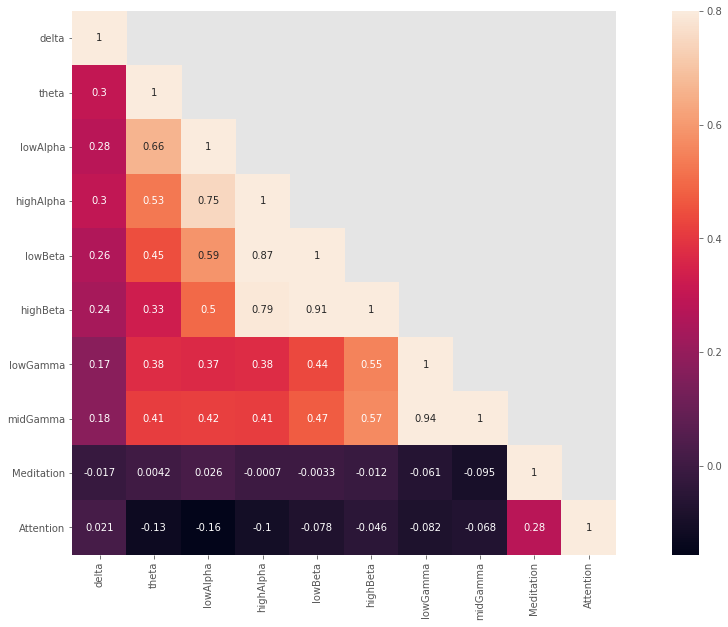

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)